# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "../Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "../Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_study = pd.merge(mouse_metadata,study_results, how='right')

# Display the data table for preview
combined_mouse_study = combined_mouse_study[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites', 
                                             'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)']]

combined_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [26]:
# Checking the number of mice.
no_of_mice = len(combined_mouse_study.groupby('Mouse ID').count())
print(f'The total number of unique mouse IDs is:',no_of_mice)

The total number of unique mouse IDs is: 249


In [27]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_mouse_study.loc[combined_mouse_study.duplicated(subset = ['Mouse ID', 'Timepoint',]), 'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mice_id = combined_mouse_study.loc[(combined_mouse_study['Mouse ID'] == 'g989')]
duplicated_mice_id

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_mouse_study[combined_mouse_study['Mouse ID'].isin(duplicated_mice) == False]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [30]:
# Checking the number of mice in the clean DataFrame.
clean_mice = clean_df['Mouse ID'].value_counts()
clean_no_mice = len(clean_mice)
clean_no_mice

248

## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_d_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_regimen = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary DataFrame.

stat_summary = pd.DataFrame({
    'Mean Tumor Volume': mean_regimen,
    'Median Tumor Volume': median_regimen,
    'Tumor Volume Variance': variance_regimen,
    'Tumor Volume Std. Dev.': standard_d_regimen,
    'Tumor Volume Std. Err.': sem_regimen
})

stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
stat_aggregation = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
stat_aggregation


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

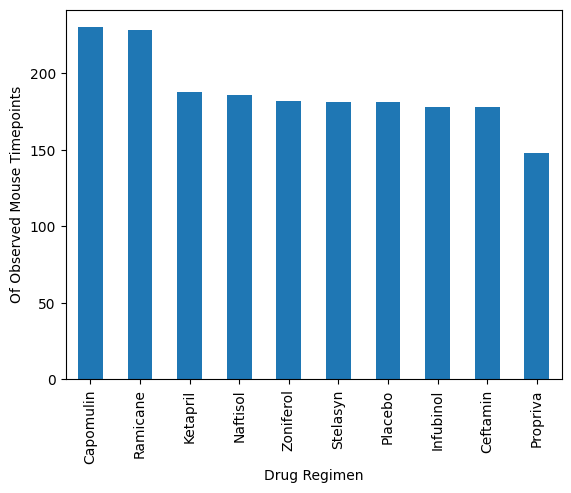

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = clean_df['Drug Regimen'].value_counts()
bar_chart_1 = mice_count.plot.bar(color = 'tab:blue')

# Axis
plt.xlabel("Drug Regimen")
plt.ylabel("Of Observed Mouse Timepoints")

plt.show()

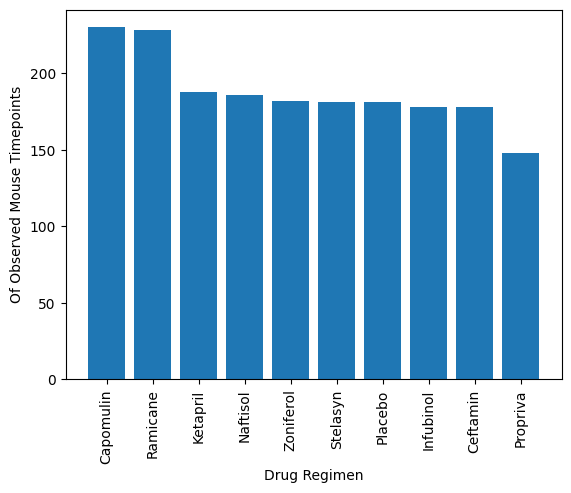

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis= mice_count.values

# Creating PyPlot bar
plt.bar(x_axis, y_axis, color='tab:blue', alpha=1, align='center')

# Assigning lables to x and y axis
plt.xlabel("Drug Regimen")
plt.ylabel("Of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

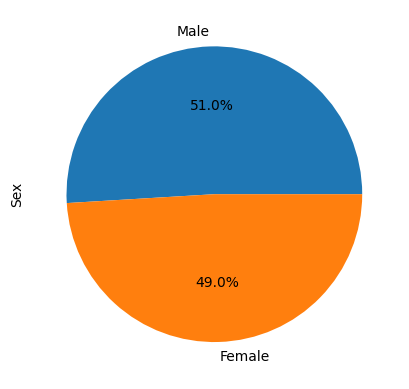

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_data = clean_df['Sex'].value_counts()
male_female_data.plot.pie(autopct= "%1.1f%%")
plt.ylabel("Sex")

plt.show()

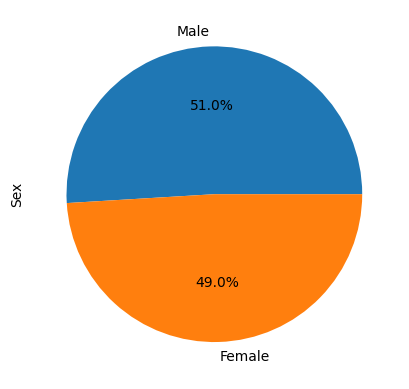

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels =['Male', 'Female']
sizes = [49.7999197, 50.200803]
plot = male_female_data.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_mouse_timepoint = combined_mouse_study.groupby(['Mouse ID'])['Timepoint'].max()
last_mouse_timepoint = last_mouse_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_combined_df = last_mouse_timepoint.merge(combined_mouse_study, on=['Mouse ID','Timepoint'],how="left")
timepoint_combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
244,z435,10,48.710661,0,Propriva,Female,12,26
245,z578,45,30.638696,0,Ramicane,Male,11,16
246,z581,45,62.754451,3,Infubinol,Female,24,25
247,z795,45,65.741070,3,Naftisol,Female,13,29


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_total = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = timepoint_combined_df.loc[timepoint_combined_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_total.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    print(f"{drug}, the outliers are: {outliers}")


Capomulin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol, the outliers are: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


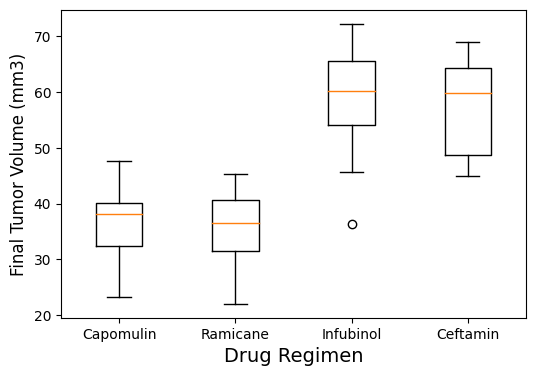

In [40]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

red_point = dict(markerfacecolor = "red", markersize=8)
box_plot_t_volume, ax1 = plt.subplots(figsize=(6,4))
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 12)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(tumor_vol_total, labels=treatments, widths = 0.4,)

plt.show()

## Line and Scatter Plots

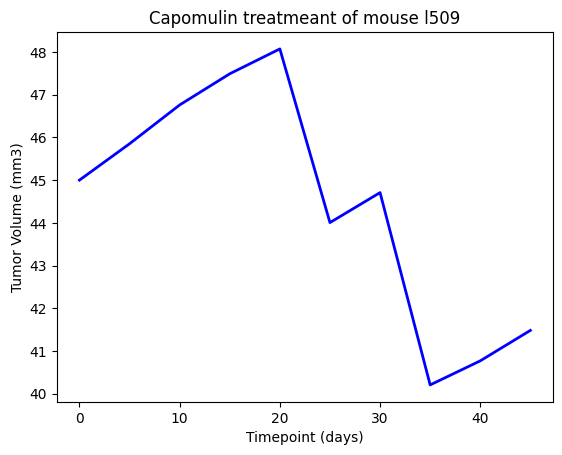

In [41]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_study = combined_mouse_study.loc[combined_mouse_study['Drug Regimen'] == 'Capomulin',:]
line_plot_campomulin = capomulin_study.loc[capomulin_study['Mouse ID'] == 'l509',:]

x_axis = line_plot_campomulin["Timepoint"]
tumor_size = line_plot_campomulin["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_size,linewidth=2,color="blue", label="Fahreneit")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()


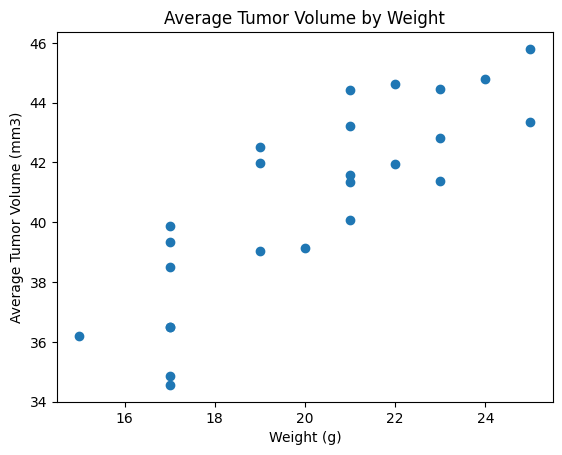

In [42]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combined_mouse_study.loc[combined_mouse_study['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse
av_capomulin_vol= pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume by Weight' })

# Merge average tumor vol
av_capomulin_vol = pd.merge(capomulin_df, av_capomulin_vol, on='Mouse ID')
final_av_vol = av_capomulin_vol[['Weight (g)', 'Average Tumor Volume by Weight']].drop_duplicates()
final_av_vol

x = final_av_vol['Weight (g)']
y = final_av_vol['Average Tumor Volume by Weight']

plt.scatter(x,y)

plt.xlabel('Weight (g)',fontsize =10)
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume by Weight')
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


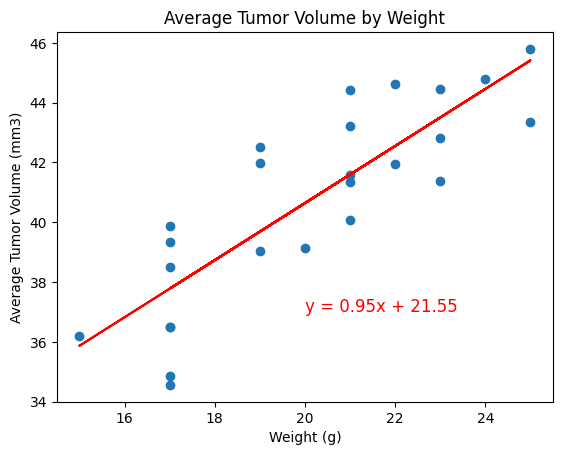

In [57]:
# Calculate the correlation coefficient and a linear regression model 

# Duplicate scatter plot code:

capomulin_df = combined_mouse_study.loc[combined_mouse_study['Drug Regimen'] == 'Capomulin']

av_capomulin_vol= pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume by Weight' })

av_capomulin_vol = pd.merge(capomulin_df, av_capomulin_vol, on='Mouse ID')
final_av_vol = av_capomulin_vol[['Weight (g)', 'Average Tumor Volume by Weight']].drop_duplicates()
final_av_vol

x = final_av_vol['Weight (g)']
y = final_av_vol['Average Tumor Volume by Weight']

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_weight_tumor = st.pearsonr(x,y)

# Print answer to calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation_weight_tumor[0],2)}.""")

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotation 
plt.annotate(line_eq,(20,37),fontsize=12,color="red")

# Add labels and title
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()